# Numbat tests

Verifying the results generated by the Numbat tests

In [1]:
import numpy as np
import pandas as pd
from scipy.special import erfc
import matplotlib.pyplot as plt
%matplotlib inline

## Kernel testing

### Diffusion kernel

Test that the correct behaviour is observed using the *NumbatDiffusion* kernel for both steady and transient analysis (the tranisent analysis also uses the *NumbatTimeDerivative* kernel).

#### Steady

In this test, Dirichlet boundary conditions are applied to set the concentration at the top and bottom boundaries to 1 and 0, respectively. A steady executioner is used, and the resulting concentration profile should vary linearly from 1 at the top to 0 at the bottom of the mesh. (Note: plot the data in the -*y* direction, ie, starting at y=20 and decreasing to y=0).

In [2]:
# Dimensional formulation
steadydata2D = pd.read_csv('../../tests/diffusion/gold/2Dsteady_conc_0001.csv');
steadydata3D = pd.read_csv('../../tests/diffusion/gold/3Dsteady_conc_0001.csv');

# Streamfunction formulation
steadydata2DSF = pd.read_csv('../../tests/diffusion/gold/2DsteadySF_conc_0001.csv');
steadydata3DSF = pd.read_csv('../../tests/diffusion/gold/3DsteadySF_conc_0001.csv');

# DG formulation
steadydata2DDG = pd.read_csv('../../tests/diffusion/gold/2DsteadyDG_conc_0001.csv');
steadydata3DDG = pd.read_csv('../../tests/diffusion/gold/3DsteadyDG_conc_0001.csv');

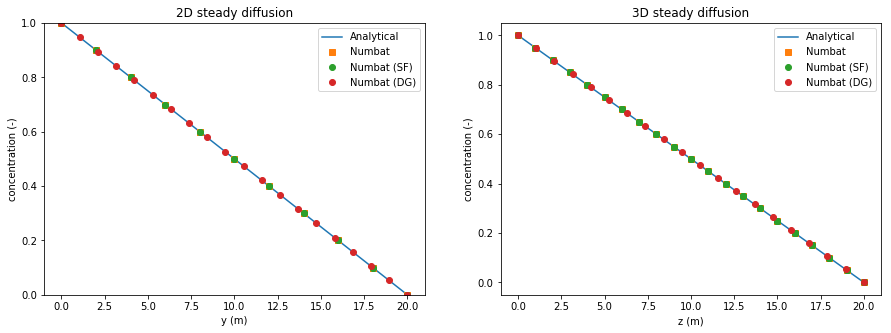

In [3]:
ydata = np.linspace(0,20,100)
cdata = np.linspace(1,0,100)

fig, axes = plt.subplots(1,2, figsize=(15,5))

# 2D results
axes[0].plot(ydata, cdata, label = 'Analytical')
axes[0].plot(20-steadydata2D.y, steadydata2D.concentration, 's', label = 'Numbat')
axes[0].plot(20-steadydata2DSF.y, steadydata2DSF.concentration, 'o', label = 'Numbat (SF)')
axes[0].plot(20-steadydata2DDG.y, steadydata2DDG.concentration, 'o', label = 'Numbat (DG)')


axes[0].legend()
axes[0].set_xlabel('y (m)')
axes[0].set_ylabel('concentration (-)')
axes[0].set_title('2D steady diffusion')
axes[0].set_ylim([0,1])

# 3D results
axes[1].plot(ydata, cdata, label = 'Analytical')
axes[1].plot(20-steadydata3D.z, steadydata3D.concentration, 's', label = 'Numbat')
axes[1].plot(20-steadydata3DSF.z, steadydata3DSF.concentration, 'o', label = 'Numbat (SF)')
axes[1].plot(20-steadydata3DDG.z, steadydata3DDG.concentration, 'o', label = 'Numbat (DG)')
axes[1].legend()
axes[1].set_xlabel('z (m)')
axes[1].set_ylabel('concentration (-)')
axes[1].set_title('3D steady diffusion')

#### Transient

In this test, Dirichlet boundary conditions are applied to set the concentration at the top and bottom boundaries to 1 and 0, respectively. A transient executioner is used. An analytical solution to this problem is well known, and the concentration profile is given by $c(z,t) = \mathrm{erfc}(u)$ where $u = z/(2 \sqrt(D t))$ and $\mathrm{erfc}$ is the complimentary error function.

(Note: plot the data in the -*y* direction, ie, starting at y=20 and decreasing to y=0).

In [4]:
D = 0.5
t = 10

def c(z,t):
    u = z / (2 * np.sqrt(D * t))
    return erfc(u)

In [5]:
# Dimensional formulation
transientdata2D = pd.read_csv('../../tests/diffusion/gold/2Dtransient_conc_0011.csv')
transientdata3D = pd.read_csv('../../tests/diffusion/gold/3Dtransient_conc_0011.csv')

# Streamfunction formulation
transientdata2DSF = pd.read_csv('../../tests/diffusion/gold/2DtransientSF_conc_0011.csv')
transientdata3DSF = pd.read_csv('../../tests/diffusion/gold/3DtransientSF_conc_0011.csv')

# DG formulation
transientdata2DDG = pd.read_csv('../../tests/diffusion/gold/2DtransientDG_conc_0011.csv')
transientdata3DDG = pd.read_csv('../../tests/diffusion/gold/3DtransientDG_conc_0011.csv')

(-0.1, 1)

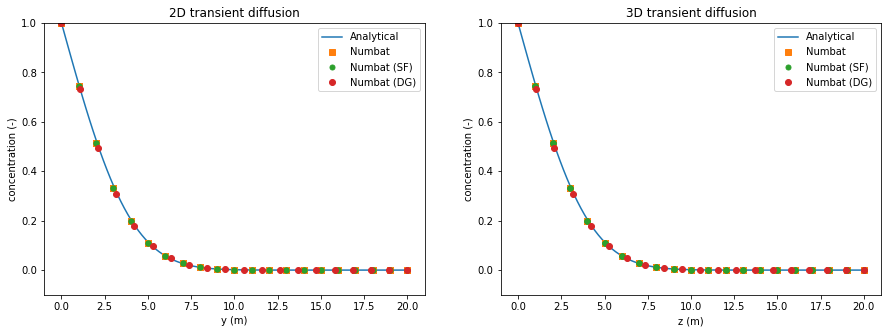

In [6]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

# 2D results
axes[0].plot(ydata, c(ydata,t), label = 'Analytical')
axes[0].plot(20-transientdata2D.y, transientdata2D.concentration, 's', label = 'Numbat')
axes[0].plot(20-transientdata2DSF.y, transientdata2DSF.concentration, 'o', ms = 5, label = 'Numbat (SF)')
axes[0].plot(20-transientdata2DDG.y, transientdata2DDG.concentration, 'o', label = 'Numbat (DG)')
axes[0].legend()
axes[0].set_xlabel('y (m)')
axes[0].set_ylabel('concentration (-)')
axes[0].set_title('2D transient diffusion')
axes[0].set_ylim([-0.1,1])

# 3D results
axes[1].plot(ydata, c(ydata,t), label = 'Analytical')
axes[1].plot(20-transientdata3D.z, transientdata3D.concentration, 's', label = 'Numbat')
axes[1].plot(20-transientdata3DSF.z, transientdata3DSF.concentration, 'o', ms = 5, label = 'Numbat (SF)')
axes[1].plot(20-transientdata3DDG.z, transientdata3DDG.concentration, 'o', label = 'Numbat (DG)')
axes[1].legend()
axes[1].set_xlabel('z (m)')
axes[1].set_ylabel('concentration (-)')
axes[1].set_title('3D transient diffusion')
axes[1].set_ylim([-0.1,1])

### Convection kernel

Test the convection kernels when a constant velocity is prescribed. In the following tests, all cases have constant velocity of 0.001 m/s. The linear 1D advection equation has a simple analytical solution in this case, where the concentration at the left boundary has advected a distance of $u t/\phi$

In [7]:
u = 0.001
phi = 0.2
c0 = 1

def c(x, t):
    return np.ceil(np.clip(u * t / phi - x, 0, c0))

xdata = np.linspace(0,1,100)

In [8]:
# Dimensional formulation
transientdata2D = pd.read_csv('../../tests/convection/gold/2Dtransient_conc_0051.csv')
transientdata3D = pd.read_csv('../../tests/convection/gold/3Dtransient_conc_0051.csv')
transientdata2Dh = pd.read_csv('../../tests/convection/gold/2Dtransient_heavy_conc_1001.csv')
transientdata3Dh = pd.read_csv('../../tests/convection/gold/3Dtransient_heavy_conc_1001.csv')

# Streamfunction formulation
transientdata2DSF = pd.read_csv('../../tests/convection/gold/2DtransientSF_conc_0051.csv')
transientdata3DSF = pd.read_csv('../../tests/convection/gold/3DtransientSF_conc_0051.csv')

# DG formulation
transientdata2DDG = pd.read_csv('../../tests/convection/gold/2DtransientDG_conc_0051.csv')
transientdata3DDG = pd.read_csv('../../tests/convection/gold/3DtransientDG_conc_0051.csv')

(-0.1, 1.1)

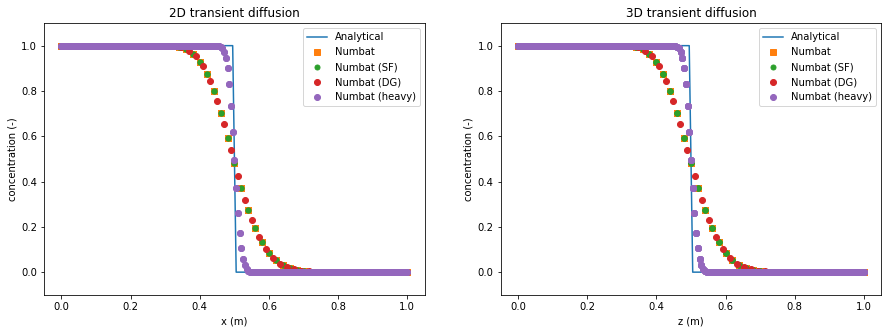

In [9]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

# 2D results
axes[0].plot(xdata, c(xdata,100), label = 'Analytical')
axes[0].plot(transientdata2D.x, transientdata2D.concentration, 's', label = 'Numbat')
axes[0].plot(transientdata2DSF.x, transientdata2DSF.concentration, 'o', ms = 5, label = 'Numbat (SF)')
axes[0].plot(transientdata2DDG.x, transientdata2DDG.concentration, 'o', label = 'Numbat (DG)')
axes[0].plot(transientdata2Dh.x, transientdata2Dh.concentration, 'o', label = 'Numbat (heavy)')
axes[0].legend()
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('concentration (-)')
axes[0].set_title('2D transient diffusion')
axes[0].set_ylim([-0.1,1.1])

# 3D results
axes[1].plot(xdata, c(xdata,100), label = 'Analytical')
axes[1].plot(1 - transientdata3D.z, transientdata3D.concentration, 's', label = 'Numbat')
axes[1].plot(1 - transientdata3DSF.z, transientdata3DSF.concentration, 'o', ms = 5, label = 'Numbat (SF)')
axes[1].plot(1 - transientdata3DDG.z, transientdata3DDG.concentration, 'o', label = 'Numbat (DG)')
axes[1].plot(1 - transientdata3Dh.z, transientdata3Dh.concentration, 'o', label = 'Numbat (heavy)')
axes[1].legend()
axes[1].set_xlabel('z (m)')
axes[1].set_ylabel('concentration (-)')
axes[1].set_title('3D transient diffusion')
axes[1].set_ylim([-0.1,1.1])

### Darcy kernel

Test that the correct behaviour is observed using the *NumbatDarcy* kernel.


In this test, Dirichlet boundary conditions are applied to set a constant pressure gradient across the mesh. The left boundary is given a pressure of 2MPa, while the right boundary is held at 1MPa. A steady executioner is used, and the resulting pressure profile should vary linearly. For the 3D case, the pressure is set to 20MPa at the top, and 1MPa at the base. In these tests, the concentration is held constant.

The calculated velocity should match the Darcy velocity $u = - k / \mu (\nabla P - \rho g)$.

In [10]:
c = 0.1
lx = 20
grad_P = (1e6 - 2e6)/lx
k = 1e-13
mu = 1e-3
rho0 = 1000
delta_rho = 10
g = 0

def rho(c):
    return rho0 + c * delta_rho

u = -k / mu * (grad_P - rho(c) * g)
print "2D Darcy velocity is ", u, " m/s (with g = 0)"
g = -9.81
u = -k / mu * (grad_P - rho(c) * g)
print "2D Darcy velocity is ", u, " m/s (with g = -9.81)"
g = 0
w = -k / mu * (-grad_P - rho(c) * g)
print "3D Darcy velocity is ", w, " m/s (with g = 0)"
g = -9.81
w = -k / mu * (-grad_P - rho(c) * g)
print "3D Darcy velocity is ", w, " m/s (with g = -9.81)"

2D Darcy velocity is  5e-06  m/s (with g = 0)
2D Darcy velocity is  4.018019e-06  m/s (with g = -9.81)
3D Darcy velocity is  -5e-06  m/s (with g = 0)
3D Darcy velocity is  -5.981981e-06  m/s (with g = -9.81)


In [11]:
darcy2D = pd.read_csv('../../tests/darcy/2Dsteady_u_0001.csv')
darcy2D_gravity = pd.read_csv('../../tests/darcy/2Dsteady_gravity_u_0001.csv')
darcy3D = pd.read_csv('../../tests/darcy/3Dsteady_w_0001.csv')
darcy3D_gravity = pd.read_csv('../../tests/darcy/3Dsteady_gravity_w_0001.csv')

In [12]:
print "2D Numbat velocity is ", darcy2D.u[0], " m/s (with g = 0)"
print "2D Numbat velocity is ", darcy2D_gravity.u[0], " m/s (with g = -9.81)"
print "3D Numbat velocity is ", darcy3D.w[0], " m/s (with g = 0)"
print "3D Numbat velocity is ", darcy3D_gravity.w[0], " m/s (with g = -9.81)"

2D Numbat velocity is  5e-06  m/s (with g = 0)
2D Numbat velocity is  4.018019e-06  m/s (with g = -9.81)
3D Numbat velocity is  -5e-06  m/s (with g = 0)
3D Numbat velocity is  -5.981981e-06  m/s (with g = -9.81)


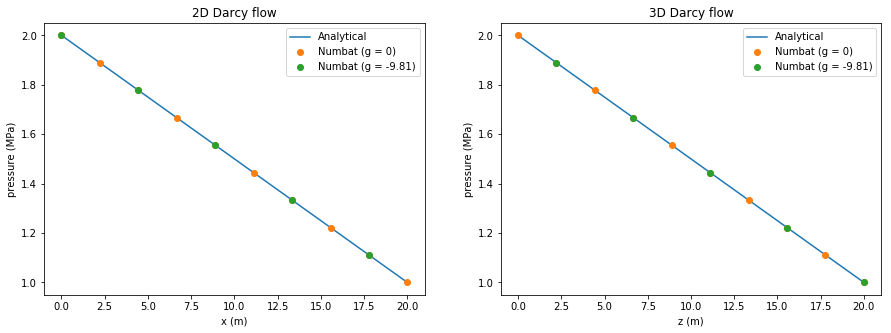

In [13]:
xdata = np.linspace(0,20,100)
pdata = np.linspace(2,1,100)

fig, axes = plt.subplots(1,2, figsize=(15,5))

# 2D results
axes[0].plot(xdata, pdata, label = 'Analytical')
axes[0].plot(darcy2D.x, darcy2D.pressure*1e-6, 'o', label = 'Numbat (g = 0)')
axes[0].plot(darcy2D_gravity.x, darcy2D_gravity.pressure*1e-6, 'o', label = 'Numbat (g = -9.81)', markevery=2)
axes[0].legend()
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('pressure (MPa)')
axes[0].set_title('2D Darcy flow')

# 3D results
axes[1].plot(xdata, pdata, label = 'Analytical')
axes[1].plot(20-darcy3D.z, darcy3D.pressure*1e-6, 'o', label = 'Numbat (g = 0)')
axes[1].plot(20-darcy3D_gravity.z, darcy3D_gravity.pressure*1e-6, 'o', label = 'Numbat (g = -9.81)', markevery=2)
axes[1].legend()
axes[1].set_xlabel('z (m)')
axes[1].set_ylabel('pressure (MPa)')
axes[1].set_title('3D Darcy flow')

## SideFlux postprocessor

Check the flux given by the *SideFlux* postprocessors is correct

In [14]:
# Parameters for the dimensional case
rho = 1010
porosity = 0.2
diffusion = 1e-3

# Analytical diffusion profile per unit width for the dimensional formulation
def f(t):
    return porosity * rho * np.sqrt(diffusion / (np.pi * t))

# Analytical diffusion profile per unit width for the dimensionless formulation
def f2(t):
    return np.sqrt(1/(np.pi * t))

# Analytical total mass per unit width for the dimensional formulation
def m(t):
    return 2 * porosity * rho * np.sqrt(diffusion * t / np.pi)

# Analytical total mass per unit width for the dimensionless formulation
def m2(t):
    return 2 * np.sqrt(t/np.pi)

In [15]:
fluxdata2D = pd.read_csv('../../tests/2D/gold/2D.csv')
fluxdata2Dc0 = pd.read_csv('../../tests/2D/gold/2D_c0.csv')
fluxdata2DSF = pd.read_csv('../../tests/2D/gold/2DSF.csv')

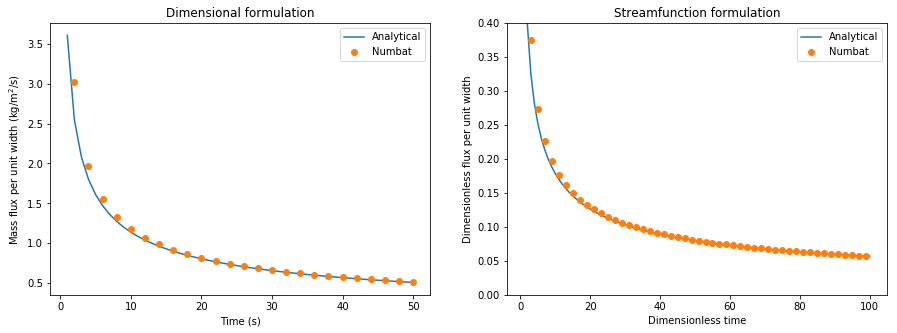

In [16]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# Dimensional case
axes[0].plot(fluxdata2D.time[0:], f(fluxdata2D.time[0:]), label = 'Analytical')
axes[0].plot(fluxdata2D.time[1:], -fluxdata2D.boundaryfluxint[1:], 'o', label = 'Numbat', markevery=2)
axes[0].legend()
axes[0].set_title('Dimensional formulation')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Mass flux per unit width (kg/m$^2$/s)')

axes[1].plot(fluxdata2DSF.time[0:], f2(fluxdata2DSF.time[0:]), label = 'Analytical')
axes[1].plot(fluxdata2DSF.time[1:], -fluxdata2DSF.boundaryfluxint[1:], 'o', label = 'Numbat', markevery=2)
axes[1].legend()
axes[1].set_ylim([0,0.4]);
axes[1].set_title('Streamfunction formulation')
axes[1].set_xlabel('Dimensionless time')
axes[1].set_ylabel('Dimensionless flux per unit width')

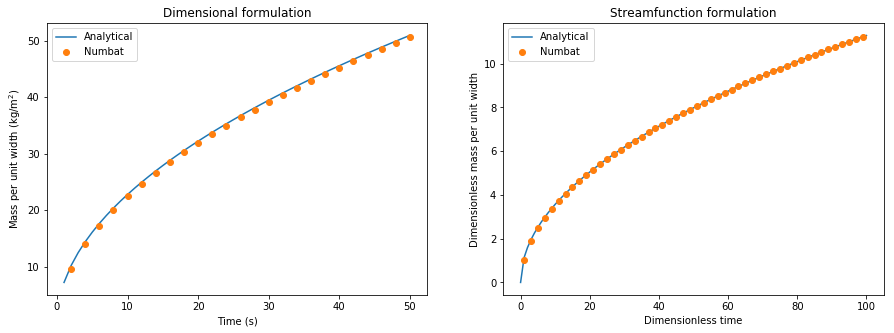

In [17]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# Dimensional case
axes[0].plot(fluxdata2D.time[0:], m(fluxdata2D.time[0:]), label = 'Analytical')
axes[0].plot(fluxdata2D.time[1:], fluxdata2D.mass[1:], 'o', label = 'Numbat', markevery=2)
axes[0].legend(loc='best')
axes[0].set_title('Dimensional formulation')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Mass per unit width (kg/m$^2$)')

axes[1].plot(fluxdata2DSF.time[0:], m2(fluxdata2DSF.time[0:]), label = 'Analytical')
axes[1].plot(fluxdata2DSF.time[1:], fluxdata2DSF.mass[1:], 'o', label = 'Numbat', markevery=2)
axes[1].legend(loc='best')
axes[1].set_title('Streamfunction formulation')
axes[1].set_xlabel('Dimensionless time')
axes[1].set_ylabel('Dimensionless mass per unit width')

Check that the correct flux and mass are returned when an unscaled concentration is provided. In this case, $C_0 = 0.05$

In [18]:
# Parameters for the dimensional case
rho = 1010
porosity = 0.2
diffusion = 1e-3
C0 = 0.05

# Analytical diffusion profile per unit width for the dimensional formulation
def f3(t):
    return C0 * porosity * rho * np.sqrt(diffusion / (np.pi * t))

# Analytical total mass per unit width for the dimensional formulation
def m3(t):
    return 2 * C0 * porosity * rho * np.sqrt(diffusion * t / np.pi)

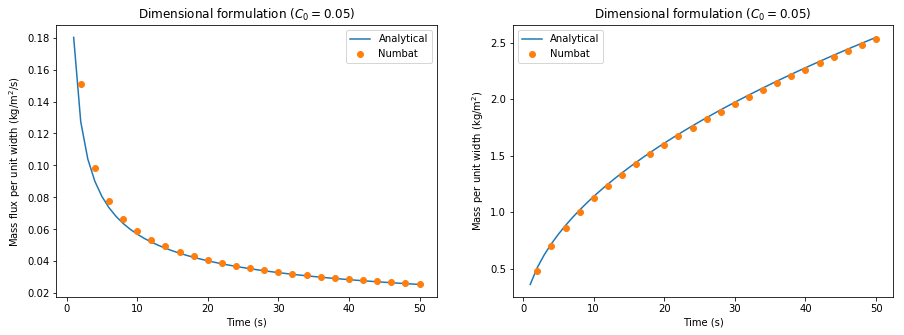

In [19]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
# Flux
axes[0].plot(fluxdata2Dc0.time[0:], f3(fluxdata2Dc0.time[0:]), label = 'Analytical')
axes[0].plot(fluxdata2Dc0.time[1:], -fluxdata2Dc0.boundaryfluxint[1:], 'o', label = 'Numbat', markevery=2)
axes[0].legend()
axes[0].set_title('Dimensional formulation ($C_0 = 0.05$)')
axes[0].set_xlabel('Time (s)')
axes[0].set_ylabel('Mass flux per unit width (kg/m$^2$/s)')

# Mass
axes[1].plot(fluxdata2Dc0.time[0:], m3(fluxdata2Dc0.time[0:]), label = 'Analytical')
axes[1].plot(fluxdata2Dc0.time[1:], fluxdata2Dc0.mass[1:], 'o', label = 'Numbat', markevery=2)
axes[1].legend(loc='best')
axes[1].set_title('Dimensional formulation ($C_0 = 0.05$)')
axes[1].set_xlabel('Time (s)')
axes[1].set_ylabel('Mass per unit width (kg/m$^2$)')

## 1D advection-diffusion solution

The 1D advection-diffusion equation has an analytical solution due to van Genuchten and Alves, *Analytical solutions of the one-dimensional convective-dispersive solute transport equation*, US Dept. Agriculture Technical Bulletin 1661 (1982). A solution to
\begin{equation}
\frac{\partial c}{\partial t} + u \frac{\partial c}{\partial x} = D \frac{\partial^2 c}{\partial x^2}
\end{equation}

is

\begin{equation}
\frac{c(x,t)}{c_0} = \frac{1}{2} \erfc \left(\frac{x - u t}{2 \sqrt{D t}}\right) + \left(\frac{u^2 t}{\pi D}\right)^{1/2} \exp \left(- \frac{(x - u t)^2}{4 D t}\right) - \frac{1}{2} \left(1 + \frac{u x}{D} + \frac{u^2 t}{D}\right) \exp\left(\frac{u x}{\pi}\right) \erfc\left(\frac{x + v t}{2 \sqrt{D t}} \right)
\end{equation}

where $u$ is the pore velocity, i.e., the fluid velocity divided by the porosity.

In [161]:
def c(x,t, D):
    porosity = 0.1
    v = 0.002 / porosity
    return 0.5 * erfc((x - v * t)/(2 *np.sqrt(D * t))) + np.sqrt(v * v * t/(np.pi * D)) * \
    np.exp(- (x - v * t)**2/(4 * D * t)) - 0.5 * (1 + v * x / D + v * v * t / D) * np.exp(v * x / D) *\
    erfc((x+v*t)/(2*np.sqrt(D*t)))

In [174]:
moosedata = pd.read_csv('../../tests/convection_diffusion/gold/2Dtransient_conc_0251.csv')
moosedata2 = pd.read_csv('../../tests/convection_diffusion/gold/2Dtransient2_conc_0251.csv')

moosedataDG = pd.read_csv('../../tests/convection_diffusion/gold/2DtransientDG_conc_0251.csv')
moosedataDG2 = pd.read_csv('../../tests/convection_diffusion/gold/2DtransientDG2_conc_0251.csv')

/Users/gre462/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: overflow encountered in exp
/Users/gre462/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in multiply


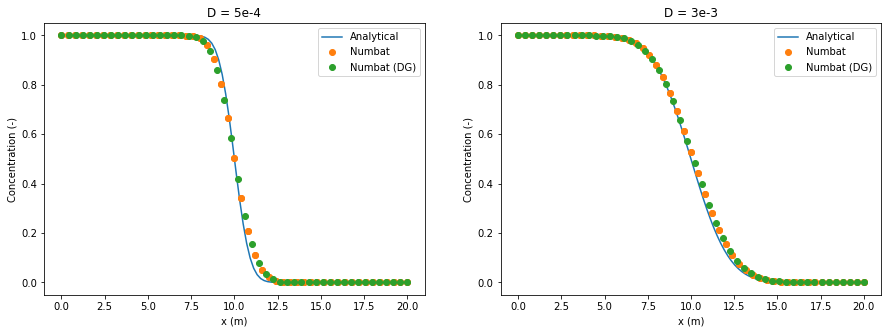

In [175]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

# Diffusion = 5e-4
axes[0].plot(xdata,c(xdata,500, 5e-4), label = 'Analytical')
axes[0].plot(moosedata.x, moosedata.concentration, 'o', label = 'Numbat')
axes[0].plot(moosedataDG.x, moosedataDG.concentration, 'o', label = 'Numbat (DG)')
axes[0].set_xlabel('x (m)')
axes[0].set_ylabel('Concentration (-)')
axes[0].legend()
axes[0].set_title('D = 5e-4')

# Diffusion = 5e-3
axes[1].plot(xdata,c(xdata,500, 3e-3), label = 'Analytical')
axes[1].plot(moosedata2.x, moosedata2.concentration, 'o', label = 'Numbat')
axes[1].plot(moosedataDG2.x, moosedataDG2.concentration, 'o', label = 'Numbat (DG)')
axes[1].set_xlabel('x (m)')
axes[1].set_ylabel('Concentration (-)')
axes[1].legend()
axes[1].set_title('D = 3e-3')